# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

План проекта:\
Изучить файл с данными.\
Загрузить и подготовить данные для обучения модели.\
Разбить данные на три выборки: обучающая, валидационная и тестовая.\
Исследовать три модели классификации: Решающее дерево, Случайный лес и Логистическая регрессия.\
Найти оптимальные параметры для каждой модели и выбрать одну из них для обучения модели.\
Оценить точность обученной модели.\
Довести целевой показатель F1-меры до 0.59.\
Провести тестирование модели.\
Измерять AUC-ROC.

## Подготовка данных

### Импортируем необходимые библиотеки

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score

### Прочитаем файл данных

In [4]:
data = pd.read_csv('Churn.csv')

### Исследуем данные

In [5]:
data.shape

(10000, 14)

In [6]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
data.duplicated().sum()

0

In [9]:
len(data['Surname'].unique())

2932

In [10]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Файл данных содержит 10000 строк.\
Дупликатов не обнаружено.\
Признаки:\
RowNumber — индекс строки в данных\
CustomerId — уникальный идентификатор клиента\
Surname — фамилия\
CreditScore — кредитный рейтинг\
Geography — страна проживания\
Gender — пол\
Age — возраст\
Tenure — сколько лет человек является клиентом банка\
Balance — баланс на счёте\
NumOfProducts — количество продуктов банка, используемых клиентом\
HasCrCard — наличие кредитной карты\
IsActiveMember — активность клиента\
EstimatedSalary — предполагаемая зарплата\
Целевой признак:\
Exited — факт ухода клиента\
\
Требуемые изменения:\
RowNumber — нумерация пользователей по порядку. Столбец не несет информации для обучения модели. Поэтому столбец можно удалить.\
CustomerId — является идентификатором пользователя — столбец также можно удалить.\
Surname — является идентифицирующей пользователя информацией, содержит 2932 уникальных значений, что сильно усложняет задачу, но не несет ценности для качества будущей модели — столбец можно удалить.\
CreditScore — сохранить данный столбец.\
Geography — всего 3 уникальных значения 'France', 'Spain', 'Germany' — значение преобразовать техникой прямого кодирования, или отображения (англ. One-Hot Encoding, OHE).\
Gender — выполнить преобразование техникой прямого кодирования, или отображения (англ. One-Hot Encoding, OHE)\
Переименуем названия столбцов в соответствии с PEP8. Для целей исследования не важно, но будем придерживаться стандартов.

In [12]:
#Удаляем ненужные столбцы
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [13]:
# Заменим названия столбцов
data.columns=['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',
       'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary',
       'exited']

In [14]:
# заменяем значения медианными
data['tenure'] = data['tenure'].fillna(data['tenure'].median())

In [15]:
# преобразовываем категориальные признаки в численные
# data['gender'] = pd.get_dummies(data['gender'], drop_first=True)

In [16]:
# преобразовываем категориальные признаки в численные техникой прямого кодирования,
# или отображения (англ. One-Hot Encoding, OHE)
# Чтобы не попасть в дамми-ловушку, применяем аргумент drop_first функции pd.get_dummies() 
data_ohe = pd.get_dummies(data, drop_first=True)

In [17]:
# Переведем названия вновь образованных колонок в нижний регистр 
data_ohe.columns = data_ohe.columns.str.lower()

In [18]:
# encoder = OrdinalEncoder() 
# data = pd.DataFrame(encoder.fit_transform(data), columns=data.columns)

### Проверим правильность подготовки данных

In [19]:
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       10000 non-null  int64  
 1   age                10000 non-null  int64  
 2   tenure             10000 non-null  float64
 3   balance            10000 non-null  float64
 4   num_of_products    10000 non-null  int64  
 5   has_cr_card        10000 non-null  int64  
 6   is_active_member   10000 non-null  int64  
 7   estimated_salary   10000 non-null  float64
 8   exited             10000 non-null  int64  
 9   geography_germany  10000 non-null  bool   
 10  geography_spain    10000 non-null  bool   
 11  gender_male        10000 non-null  bool   
dtypes: bool(3), float64(3), int64(6)
memory usage: 732.6 KB


In [20]:
data_ohe.head(10)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_germany,geography_spain,gender_male
0,619,42,2.0,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1.0,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8.0,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1.0,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2.0,125510.82,1,1,1,79084.10,0,False,True,False
5,645,44,8.0,113755.78,2,1,0,149756.71,1,False,True,True
6,822,50,7.0,0.00,2,1,1,10062.80,0,False,False,True
7,376,29,4.0,115046.74,4,1,0,119346.88,1,True,False,False
8,501,44,4.0,142051.07,2,0,1,74940.50,0,False,False,True
9,684,27,2.0,134603.88,1,1,1,71725.73,0,False,False,True


## Исследование задачи

In [21]:
# data['exited'].sum() / len(data)

In [22]:
# 1 - data['exited'].sum() / len(data)

exited
0    7963
1    2037
Name: count, dtype: int64


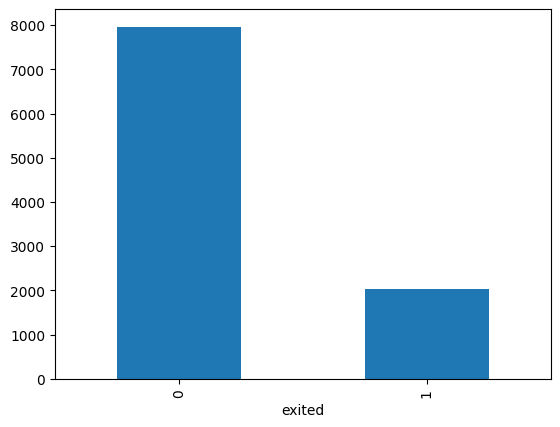

In [23]:
# Посмотрим дисбаланс в данных
print(data_ohe['exited'].value_counts())
data_ohe['exited'].value_counts().plot(kind='bar')
plt.show()

In [24]:
# Вычислим коэффициент дисбаланса, он нам понадобится в дальнейшем.
imbalance_ratio = round((1 - data_ohe['exited'].sum() / len(data_ohe)) / (data_ohe['exited'].sum() / len(data_ohe)))
imbalance_ratio

4

Имеется существенный дисбаланс - доля объектов отрицательного класса выше почти в 4 раза.

## Обучим модели без учета дисбаланса

### Делим выборку на данные на обучающую, валидационную и тестовую выборки в соотношении 60\20\20

In [25]:
data_train, aux_data = train_test_split(data_ohe, test_size=0.4, random_state=54321, stratify=data_ohe['exited'])
data_valid, data_test = train_test_split(aux_data, test_size=0.5, random_state=54321, stratify=aux_data['exited'])

In [26]:
print('Размер обучающей выборки', data_train.shape[0])
print('Размер валидационной выборки', data_valid.shape[0])
print('Размер тестовой выборки', data_test.shape[0])

Размер обучающей выборки 6000
Размер валидационной выборки 2000
Размер тестовой выборки 2000


### Создаем отдельные переменные для признаков 

In [27]:
features_train = data_train.drop(['exited'], axis=1)
target_train = data_train['exited']
features_valid = data_valid.drop(['exited'], axis=1)
target_valid = data_valid['exited']
features_test = data_test.drop(['exited'], axis=1)
target_test = data_test['exited']

Проверим дисбаланс после разделения

exited
0    4778
1    1222
Name: count, dtype: int64


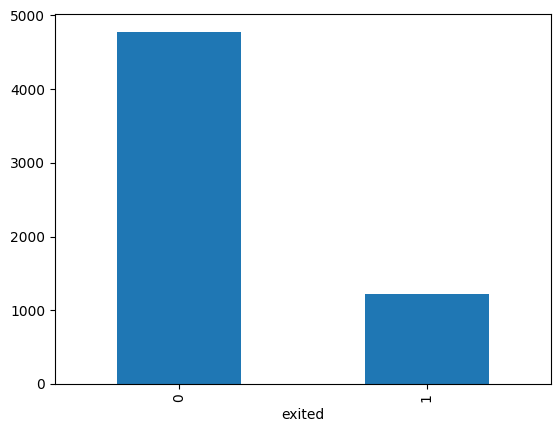

In [28]:
print(target_train.value_counts())
target_train.value_counts().plot(kind='bar')
plt.show()

exited
0    1593
1     407
Name: count, dtype: int64


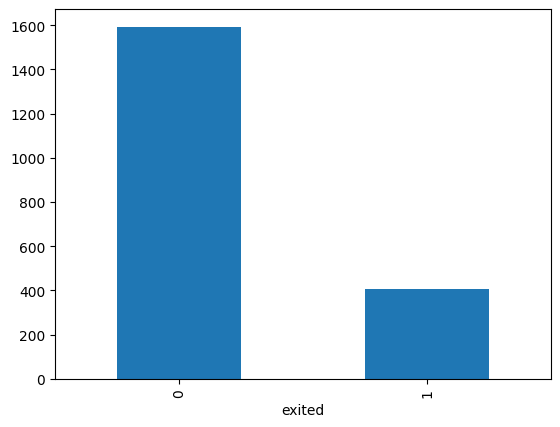

In [29]:
print(target_valid.value_counts())
target_valid.value_counts().plot(kind='bar')
plt.show()

exited
0    1592
1     408
Name: count, dtype: int64


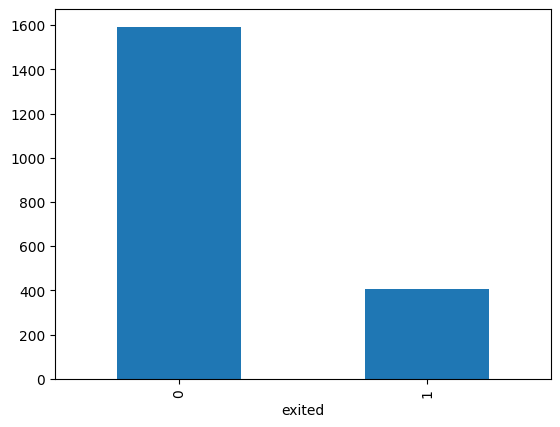

In [30]:
print(target_test.value_counts())
target_test.value_counts().plot(kind='bar')
plt.show()

Дисбаланс сохранился при разделении выборки

Масштабируем признаки в колонках 'credit_score', 'age',	'tenure',	'balance', 'estimated_salary'

In [31]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features_train[numeric]) 
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

In [32]:
features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
2515,-0.900864,0.110931,-0.372657,-1.235027,1,1,0,-0.243834,False,False,True
4669,-2.158606,1.070682,-0.735575,0.646583,1,1,0,-0.986220,True,False,True
5568,0.440035,-0.081019,-0.009738,1.949070,2,1,1,-1.483786,False,False,True
6237,-0.214823,-1.040770,-0.009738,-1.235027,2,1,1,0.589081,False,False,False
2386,-1.139939,0.686782,-0.372657,0.764431,2,1,0,-0.086293,False,False,True


In [33]:
features_valid.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
6907,-1.368619,-0.464919,-0.009738,-1.235027,1,1,0,-0.539566,False,False,True
6968,-1.462171,1.070682,0.716099,0.754629,1,1,1,-1.318468,True,False,False
3224,-0.058904,0.206906,-1.098494,0.994545,1,1,0,0.531049,True,False,False
9597,-1.472565,-1.232720,1.804854,-1.235027,2,1,1,-1.624899,False,False,True
812,-1.399803,-0.560895,-0.735575,-1.235027,2,1,1,-0.710184,False,True,False


In [34]:
features_test.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
7179,613,42,7.0,115076.06,1,1,1,79323.61,False,False,True
1062,613,38,9.0,67111.65,1,1,0,78566.64,True,False,True
2531,607,47,4.0,148826.32,1,1,1,79450.61,True,False,True
2537,573,33,5.0,90124.64,1,1,0,137476.71,False,False,False
7273,660,38,6.0,109869.32,1,1,1,154641.91,False,True,True


### Проведем обучение различных моделей без учета дисбаланса

#### Решающее дерево

In [35]:
%%time

best_model_tree = None
best_result_tree = 0

for depth in range(1, 25):
    model_tree = DecisionTreeClassifier(random_state=54321, max_depth=depth) 
    model_tree.fit(features_train, target_train) 
    predictions_tree = model_tree.predict(features_valid) 
    result = f1_score(target_valid, predictions_tree) 
#     print(depth, result)
    if result > best_result_tree:
        best_model_tree = model_tree
        best_result_tree = result

probabilities_valid = best_model_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print("Модель:", best_model_tree, "F1-мера лучшей модели решающего дерева:", best_result_tree)
print('AUC-ROC лучшей модели решающего дерева:', roc_auc_score(target_valid, probabilities_one_valid))

Модель: DecisionTreeClassifier(max_depth=9, random_state=54321) F1-мера лучшей модели решающего дерева: 0.5795454545454546
AUC-ROC лучшей модели решающего дерева: 0.8105956495787005
CPU times: total: 672 ms
Wall time: 769 ms


#### Модель - случайный лес

In [36]:
%%time
est_e = 0
depth_e = 0
best_model_forest = None
best_result_forest = 0
for depth in range(1, 25, 5):
    for est in range(50, 250, 2):
        model_forest = RandomForestClassifier(random_state=54321, n_estimators=est, max_depth=depth) 
        model_forest.fit(features_train, target_train) 
        predictions_forest = model_forest.predict(features_valid) 
        result = f1_score(target_valid, predictions_forest) 
#         print("Количество решающих деревьев:", est)
#         print('Уровень (глубина) каждого дерева', depth)
#         print("F1-мера:", result) 
#         print()
        if result > best_result_forest:
            est_e = est
            depth_e = depth
            best_model_forest = model_forest
            best_result_forest = result
print("Количество решающих деревьев:", est_e)
print('Уровень (глубина)  дерева лучшей модели случайного леса', depth_e)

probabilities_valid = best_model_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print("F1-мера лучшей модели случайного леса:", best_result_forest) 
print('AUC-ROC лучшей модели случайного леса:', roc_auc_score(target_valid, probabilities_one_valid))

Количество решающих деревьев: 78
Уровень (глубина)  дерева лучшей модели случайного леса 11
F1-мера лучшей модели случайного леса: 0.6158536585365854
AUC-ROC лучшей модели случайного леса: 0.8516544279256143
CPU times: total: 8min 52s
Wall time: 9min 40s


#### Модель - логистическая регрессия 

In [37]:
%%time

model_regression = LogisticRegression(random_state=54321, max_iter=1000)
model_regression.fit(features_train, target_train) 
predictions_regression = model_regression.predict(features_valid)
result = f1_score(target_valid, predictions_regression)

probabilities_valid = model_regression.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print("F1-мера модели логистической регрессии:", result)
print('AUC-ROC', roc_auc_score(target_valid, probabilities_one_valid))

F1-мера модели логистической регрессии: 0.31672597864768687
AUC-ROC 0.7737197906689431
CPU times: total: 0 ns
Wall time: 17.8 ms


По результатам проверки лучшие значения F1-меры показывает модель случайного леса.

## Борьба с дисбалансом

Борьба с дисбалансом может проводиться разными способами:

### Взвешивание классов
Придадим объектам редкого класса больший вес.

In [38]:
# Модель - случайный лес

model_forest = RandomForestClassifier(random_state=54321, 
            n_estimators=est_e,
            max_depth = depth_e, 
            class_weight='balanced') 
model_forest.fit(features_train, target_train) 
predictions = model_forest.predict(features_valid) 
result = f1_score(target_valid, predictions) 

probabilities_valid = model_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print('F1-мера', result)
print('AUC-ROC', roc_auc_score(target_valid, probabilities_one_valid))

F1-мера 0.6310299869621905
AUC-ROC 0.8552265670909739


In [39]:
# Модель - логистическая регрессия

model_regression = LogisticRegression(random_state=54321, max_iter=1000, class_weight='balanced')
model_regression.fit(features_train, target_train) 
predictions_regression = model_regression.predict(features_valid)
result = f1_score(target_valid, predictions_regression) 

probabilities_valid = model_regression.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print("F1-мера модели логистической регрессии:", result)
print('AUC-ROC', roc_auc_score(target_valid, probabilities_one_valid))

F1-мера модели логистической регрессии: 0.5004359197907585
AUC-ROC 0.774813334135368


Результат случайного леса улучшился, целевое значение F1-меры достигнуто. Модель логистической регрессии показала резкое улучшение качества предсказания.

### Увеличение выборки

In [40]:
# Модель - случайный лес

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=54321)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, imbalance_ratio)

model_forest = RandomForestClassifier(random_state=54321, n_estimators=est_e, max_depth = depth_e) 
model_forest.fit(features_upsampled, target_upsampled) 
predictions = model_forest.predict(features_valid) 
result = f1_score(target_valid, predictions) 
    
probabilities_valid = model_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print('F1-мера', result)
print('AUC-ROC', roc_auc_score(target_valid, probabilities_one_valid))

F1-мера 0.6143187066974596
AUC-ROC 0.8544738883721935


In [41]:
# Модель - логистическая регрессия

model_regression = LogisticRegression(random_state=54321, max_iter=1000)
model_regression.fit(features_upsampled, target_upsampled) 
predictions_regression = model_regression.predict(features_valid)
result = f1_score(target_valid, predictions_regression) 

probabilities_valid = model_regression.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print("F1-мера модели логистической регрессии:", result)
print('AUC-ROC', roc_auc_score(target_valid, probabilities_one_valid))

F1-мера модели логистической регрессии: 0.4974182444061962
AUC-ROC 0.7748009951399781


In [42]:
# Проверим на дисбаланс
target_upsampled.value_counts(normalize=True)

exited
1    0.50569
0    0.49431
Name: proportion, dtype: float64

Целевой показатель F1-меры достигнут.

### Уменьшение выборки

In [43]:
# Модель - случайный лес

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=54321)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=54321)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=54321)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 1/imbalance_ratio)

model_forest = RandomForestClassifier(random_state=54321, n_estimators=est_e, max_depth = depth_e) 
model_forest.fit(features_downsampled, target_downsampled) 
predicted_valid = model_forest.predict(features_valid)
result = f1_score(target_valid, predicted_valid) 

probabilities_valid = model_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print('F1-мера', result)
print('AUC-ROC', roc_auc_score(target_valid, probabilities_one_valid))

F1-мера 0.5855513307984791
AUC-ROC 0.8462391513238972


In [44]:
# Модель - логистическая регрессия

model_regression = LogisticRegression(random_state=54321, max_iter=1000)
model_regression.fit(features_downsampled, target_downsampled) 
predictions_regression = model_regression.predict(features_valid)
result = f1_score(target_valid, predictions_regression) 

probabilities_valid = model_regression.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print("F1-мера модели логистической регрессии:", result)
print('AUC-ROC', roc_auc_score(target_valid, probabilities_one_valid))

F1-мера модели логистической регрессии: 0.504704875962361
AUC-ROC 0.774023638430418


In [45]:
# Проверим на дисбаланс
target_downsampled.value_counts(normalize=True)

exited
1    0.505795
0    0.494205
Name: proportion, dtype: float64

### После проведения манипуляций с данными повторим поиск лучшей модели и подберем гиперпараметры лучшей модели. 

In [46]:
%%time
# Модель - решающее дерево
# Увеличенная выборка 

best_model_tree = None
best_result_tree = 0

for depth in range(1, 25):
    model_tree = DecisionTreeClassifier(random_state=54321, max_depth=depth) 
    model_tree.fit(features_upsampled, target_upsampled) 
    predictions_tree = model_tree.predict(features_valid) 
    result = f1_score(target_valid, predictions_tree) 
#     print(depth, result)
    if result > best_result_tree:
        best_model_tree = model_tree
        best_result_tree = result

probabilities_valid = best_model_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print("Модель:", best_model_tree, "F1-мера лучшей модели решающего дерева:", best_result_tree)
print('AUC-ROC лучшей модели решающего дерева:', roc_auc_score(target_valid, probabilities_one_valid))

Модель: DecisionTreeClassifier(max_depth=6, random_state=54321) F1-мера лучшей модели решающего дерева: 0.5711645101663586
AUC-ROC лучшей модели решающего дерева: 0.8269895473285305
CPU times: total: 797 ms
Wall time: 951 ms


In [47]:
%%time
# Модель - решающее дерево
# Увеличенная выборка с балансировкой классов

best_model_tree = None
best_result_tree = 0

for depth in range(1, 25):
    model_tree = DecisionTreeClassifier(random_state=54321, max_depth=depth, class_weight='balanced') 
    model_tree.fit(features_upsampled, target_upsampled) 
    predictions_tree = model_tree.predict(features_valid) 
    result = f1_score(target_valid, predictions_tree) 
#     print(depth, result)
    if result > best_result_tree:
        best_model_tree = model_tree
        best_result_tree = result

probabilities_valid = best_model_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print("Модель:", best_model_tree, "F1-мера лучшей модели решающего дерева:", best_result_tree)
print('AUC-ROC лучшей модели решающего дерева:', roc_auc_score(target_valid, probabilities_one_valid))

Модель: DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=54321) F1-мера лучшей модели решающего дерева: 0.5716928769657724
AUC-ROC лучшей модели решающего дерева: 0.8275802767328191
CPU times: total: 875 ms
Wall time: 1.1 s


In [48]:
%%time
# Модель - решающее дерево
# Уменьшенная выборка с балансировкой классов

best_model_tree = None
best_result_tree = 0

for depth in range(1, 25):
    model_tree = DecisionTreeClassifier(random_state=54321, max_depth=depth, class_weight='balanced') 
    model_tree.fit(features_downsampled, target_downsampled) 
    predictions_tree = model_tree.predict(features_valid) 
    result = f1_score(target_valid, predictions_tree) 
#     print(depth, result)
    if result > best_result_tree:
        best_model_tree = model_tree
        best_result_tree = result

probabilities_valid = best_model_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print("Модель:", best_model_tree, "F1-мера лучшей модели решающего дерева:", best_result_tree)
print('AUC-ROC лучшей модели решающего дерева:', roc_auc_score(target_valid, probabilities_one_valid))

Модель: DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=54321) F1-мера лучшей модели решающего дерева: 0.567926455566905
AUC-ROC лучшей модели решающего дерева: 0.812422592083609
CPU times: total: 328 ms
Wall time: 434 ms


In [49]:
%%time
# Модель - решающее дерево
# Уменьшенная выборка 

best_model_tree = None
best_result_tree = 0

for depth in range(1, 25):
    model_tree = DecisionTreeClassifier(random_state=54321, max_depth=depth) 
    model_tree.fit(features_downsampled, target_downsampled) 
    predictions_tree = model_tree.predict(features_valid) 
    result = f1_score(target_valid, predictions_tree) 
#     print(depth, result)
    if result > best_result_tree:
        best_model_tree = model_tree
        best_result_tree = result

probabilities_valid = best_model_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print("Модель:", best_model_tree, "F1-мера лучшей модели решающего дерева:", best_result_tree)
print('AUC-ROC лучшей модели решающего дерева:', roc_auc_score(target_valid, probabilities_one_valid))

Модель: DecisionTreeClassifier(max_depth=4, random_state=54321) F1-мера лучшей модели решающего дерева: 0.567926455566905
AUC-ROC лучшей модели решающего дерева: 0.812422592083609
CPU times: total: 312 ms
Wall time: 380 ms


In [50]:
%%time
# Модель - случайный лес
# Увеличение выборки с балансировкой классов

est_e = 0
depth_e = 0
best_model_forest = None
best_result_forest = 0
for depth in range(1, 25, 5):
    for est in range(50, 250, 2):
        model_forest = RandomForestClassifier(random_state=54321, n_estimators=est, max_depth=depth, class_weight='balanced') 
        model_forest.fit(features_upsampled, target_upsampled) 
        predictions_forest = model_forest.predict(features_valid) 
        result = f1_score(target_valid, predictions_forest) 
#         print("Количество решающих деревьев:", est)
#         print('Уровень (глубина) каждого дерева', depth)
#         print("F1-мера:", result) 
#         print()
        if result > best_result_forest:
            est_e = est
            depth_e = depth
            best_model_forest = model_forest
            best_result_forest = result
print("Количество решающих деревьев:", est_e)
print('Уровень (глубина)  дерева лучшей модели случайного леса', depth_e)

probabilities_valid = best_model_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print("F1-мера лучшей модели случайного леса:", best_result_forest) 
print('AUC-ROC лучшей модели случайного леса:', roc_auc_score(target_valid, probabilities_one_valid))

Количество решающих деревьев: 92
Уровень (глубина)  дерева лучшей модели случайного леса 16
F1-мера лучшей модели случайного леса: 0.6385224274406333
AUC-ROC лучшей модели случайного леса: 0.8551733551733551
CPU times: total: 11min 42s
Wall time: 13min 22s


In [51]:
%%time
# Модель - случайный лес
# Увеличение выборки

est_e = 0
depth_e = 0
best_model_forest = None
best_result_forest = 0
for depth in range(1, 25, 5):
    for est in range(50, 250, 2):
        model_forest = RandomForestClassifier(random_state=54321, n_estimators=est, max_depth=depth) 
        model_forest.fit(features_upsampled, target_upsampled) 
        predictions_forest = model_forest.predict(features_valid) 
        result = f1_score(target_valid, predictions_forest) 
#         print("Количество решающих деревьев:", est)
#         print('Уровень (глубина) каждого дерева', depth)
#         print("F1-мера:", result) 
#         print()
        if result > best_result_forest:
            est_e = est
            depth_e = depth
            best_model_forest = model_forest
            best_result_forest = result
print("Количество решающих деревьев:", est_e)
print('Уровень (глубина)  дерева лучшей модели случайного леса', depth_e)

probabilities_valid = best_model_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print("F1-мера лучшей модели случайного леса:", best_result_forest) 
print('AUC-ROC лучшей модели случайного леса:', roc_auc_score(target_valid, probabilities_one_valid))

Количество решающих деревьев: 248
Уровень (глубина)  дерева лучшей модели случайного леса 16
F1-мера лучшей модели случайного леса: 0.6333771353482259
AUC-ROC лучшей модели случайного леса: 0.8527094120314459
CPU times: total: 11min 48s
Wall time: 13min 31s


In [52]:
%%time
# Модель - случайный лес
# Уменьшение выборки с балансировкой классов

est_e = 0
depth_e = 0
best_model_forest = None
best_result_forest = 0
for depth in range(1, 25, 5):
    for est in range(50, 250, 2):
        model_forest = RandomForestClassifier(random_state=54321, n_estimators=est, max_depth=depth, class_weight='balanced') 
        model_forest.fit(features_downsampled, target_downsampled) 
        predictions_forest = model_forest.predict(features_valid) 
        result = f1_score(target_valid, predictions_forest) 
#         print("Количество решающих деревьев:", est)
#         print('Уровень (глубина) каждого дерева', depth)
#         print("F1-мера:", result) 
#         print()
        if result > best_result_forest:
            est_e = est
            depth_e = depth
            best_model_forest = model_forest
            best_result_forest = result
print("Количество решающих деревьев:", est_e)
print('Уровень (глубина)  дерева лучшей модели случайного леса', depth_e)

probabilities_valid = best_model_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print("F1-мера лучшей модели случайного леса:", best_result_forest) 
print('AUC-ROC лучшей модели случайного леса:', roc_auc_score(target_valid, probabilities_one_valid))

Количество решающих деревьев: 156
Уровень (глубина)  дерева лучшей модели случайного леса 16
F1-мера лучшей модели случайного леса: 0.5859154929577465
AUC-ROC лучшей модели случайного леса: 0.8479049157015258
CPU times: total: 4min 7s
Wall time: 4min 19s


In [53]:
%%time
# Модель - случайный лес
# Уменьшение выборки

est_e = 0
depth_e = 0
best_model_forest = None
best_result_forest = 0
for depth in range(1, 25, 5):
    for est in range(50, 250, 2):
        model_forest = RandomForestClassifier(random_state=54321, n_estimators=est, max_depth=depth) 
        model_forest.fit(features_downsampled, target_downsampled) 
        predictions_forest = model_forest.predict(features_valid) 
        result = f1_score(target_valid, predictions_forest) 
#         print("Количество решающих деревьев:", est)
#         print('Уровень (глубина) каждого дерева', depth)
#         print("F1-мера:", result) 
#         print()
        if result > best_result_forest:
            est_e = est
            depth_e = depth
            best_model_forest = model_forest
            best_result_forest = result
print("Количество решающих деревьев:", est_e)
print('Уровень (глубина)  дерева лучшей модели случайного леса', depth_e)

probabilities_valid = best_model_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print("F1-мера лучшей модели случайного леса:", best_result_forest) 
print('AUC-ROC лучшей модели случайного леса:', roc_auc_score(target_valid, probabilities_one_valid))

Количество решающих деревьев: 54
Уровень (глубина)  дерева лучшей модели случайного леса 11
F1-мера лучшей модели случайного леса: 0.5931558935361216
AUC-ROC лучшей модели случайного леса: 0.8437574708761149
CPU times: total: 4min 21s
Wall time: 4min 37s


In [54]:
%%time
# Модель логистической регрессии
# Увеличение выборки с балансировкой классов

model_regression_balanced = LogisticRegression(random_state=54321, max_iter=1000, class_weight='balanced')
model_regression_balanced.fit(features_upsampled, target_upsampled) 
predictions_regression = model_regression_balanced.predict(features_valid)
result = f1_score(target_valid, predictions_regression)

probabilities_valid = model_regression_balanced.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print("F1-мера модели логистической регрессии:", result)
print('AUC-ROC', roc_auc_score(target_valid, probabilities_one_valid))

F1-мера модели логистической регрессии: 0.5008726003490401
AUC-ROC 0.7748195036330631
CPU times: total: 0 ns
Wall time: 28.5 ms


In [55]:
%%time
# Модель логистической регрессии
# Увеличение выборки

model_regression = LogisticRegression(random_state=54321, max_iter=1000)
model_regression.fit(features_upsampled, target_upsampled) 
predictions_regression = model_regression.predict(features_valid)
result = f1_score(target_valid, predictions_regression)

probabilities_valid = model_regression.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print("F1-мера модели логистической регрессии:", result)
print('AUC-ROC', roc_auc_score(target_valid, probabilities_one_valid))

F1-мера модели логистической регрессии: 0.4974182444061962
AUC-ROC 0.7748009951399781
CPU times: total: 31.2 ms
Wall time: 28.2 ms


In [56]:
%%time
# Модель логистической регрессии
# Уменьшение выборки с балансировкой классов

model_regression_balanced = LogisticRegression(random_state=54321, max_iter=1000, class_weight='balanced')
model_regression_balanced.fit(features_downsampled, target_downsampled) 
predictions_regression = model_regression_balanced.predict(features_valid)
result = f1_score(target_valid, predictions_regression)

probabilities_valid = model_regression_balanced.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print("F1-мера модели логистической регрессии:", result)
print('AUC-ROC', roc_auc_score(target_valid, probabilities_one_valid))

F1-мера модели логистической регрессии: 0.5051724137931034
AUC-ROC 0.7740282655536893
CPU times: total: 0 ns
Wall time: 12.5 ms


In [57]:
%%time
# Модель логистической регрессии
# Уменьшение выборки

model_regression = LogisticRegression(random_state=54321, max_iter=1000)
model_regression.fit(features_downsampled, target_downsampled) 
predictions_regression = model_regression.predict(features_valid)
result = f1_score(target_valid, predictions_regression)

probabilities_valid = model_regression.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print("F1-мера модели логистической регрессии:", result)
print('AUC-ROC', roc_auc_score(target_valid, probabilities_one_valid))

F1-мера модели логистической регрессии: 0.504704875962361
AUC-ROC 0.774023638430418
CPU times: total: 15.6 ms
Wall time: 25.7 ms


По результатам проверки лучшие результаты показывает модель решающего леса с параметрами: техника борьбы с дисбалансом upsampling, количество решающих деревьев: 248, уровень (глубина)  дерева лучшей модели случайного леса 16. Ее мы и отправим на тестирование.

## Тестирование модели

In [58]:
# Масштабируем тестовую выборку
features_test[numeric] = scaler.transform(features_test[numeric])

In [59]:
%%time
# Модель - случайный лес 

model_forest = RandomForestClassifier(random_state=54321, n_estimators=148, max_depth = 16, class_weight='balanced') 
model_forest.fit(features_upsampled, target_upsampled) 
predictions = model_forest.predict(features_test) 
result_test = f1_score(target_test, predictions) 

probabilities_test = model_forest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

print('Тестовое значение F1-меры = ', result_test)
print('AUC-ROC', roc_auc_score(target_test, probabilities_one_test))

Тестовое значение F1-меры =  0.6050198150594451
AUC-ROC 0.851525550546852
CPU times: total: 1.88 s
Wall time: 2.03 s


На всякий случай проверим лучшую модель на адекватность.

In [60]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(features_upsampled, target_upsampled)
predictions_adequacy_test = dummy_clf.predict(features_test)
result = f1_score(target_test, predictions_adequacy_test)
print("F1-мера адекватности:", result)

F1-мера адекватности: 0.3121951219512195


Вывод: Целевой показатель F1-меры достигнут.

## Общий вывод

В ходе выполнения проекта:

Изучен файл с данными.\
Данные подготовлены для обучения модели\
Разбиты данные на три выборки: обучающая, валидационная и тестовая.\
Исследованы три модели классификации: Решающее дерево, Случайный лес и Логистическая регрессия.\
Найдены оптимальные параметры для каждой модели и выбрана одна из них для обучения модели.\
Оценена точность обученной модели.\
Целевой показатель F1-меры достигнут.\
Проведено тестирование модели.